<a href="https://colab.research.google.com/github/mateus-neres/Analise_estatistica_enem_2019/blob/main/etapa10_teste_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TESTE t PARA UMA AMOSTRA**

In [23]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [24]:
enem_sp = pd.read_csv("/content/drive/MyDrive/curso_Udemy/curso_estatistica_python/enem_2019_tratado.csv",
                      sep = ",", encoding = "iso-8859-1")

In [25]:
enem_sp.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,NaN,1,1,1,1,564.6,585.8,592.9,600.2,inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,Belém,1,1,1,1,576.2,641.1,634.3,731.8,inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,São Bernardo do Campo,1,1,1,1,402.2,424.8,509.6,393.2,espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,NaN,1,1,1,1,399.6,426.8,487.2,419.2,inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,NaN,1,1,1,1,625.7,646.5,629.3,796.1,inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,sim


In [26]:
colegioY = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [27]:
colegioY.shape

(30, 28)

In [28]:
colegioY.head()

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,NO_MUNICIPIO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,548.8,576.4,59.2,64.0,inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,603.9,577.6,61.6,699.5,inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,615.4,601.1,592.6,780.2,inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,São Paulo,1,1,1,1,574.7,658.6,59.4,732.2,inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,São Paulo,1,1,1,1,592.9,560.7,603.8,756.3,inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,sim


##01) Analisar a classificação das variáveis

In [29]:
colegioY.dtypes

INSCRICAO                object
MUNICIPIO_RESIDENCIA     object
IDADE                     int64
SEXO                     object
ESTADO_CIVIL              int64
RACA                     object
NACIONALIDADE             int64
TP_ST_CONCLUSAO           int64
ESCOLA                   object
CO_ESCOLA               float64
NO_MUNICIPIO_ESC         object
TP_PRESENCA_CN            int64
TP_PRESENCA_CH            int64
TP_PRESENCA_LC            int64
TP_PRESENCA_MT            int64
NOTA_CN                 float64
NOTA_CH                 float64
NOTA_LC                 float64
NOTA_MT                 float64
LINGUA                   object
TP_STATUS_REDACAO       float64
COMP1                   float64
COMP2                   float64
COMP3                   float64
COMP4                   float64
COMP5                   float64
NOTA_REDACAO            float64
INTERNET                 object
dtype: object

##02) Analisar valores missing

In [30]:
colegioY.isnull().sum()

INSCRICAO               0
MUNICIPIO_RESIDENCIA    0
IDADE                   0
SEXO                    0
ESTADO_CIVIL            0
RACA                    0
NACIONALIDADE           0
TP_ST_CONCLUSAO         0
ESCOLA                  0
CO_ESCOLA               0
NO_MUNICIPIO_ESC        0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
TP_PRESENCA_MT          0
NOTA_CN                 0
NOTA_CH                 0
NOTA_LC                 0
NOTA_MT                 0
LINGUA                  0
TP_STATUS_REDACAO       0
COMP1                   0
COMP2                   0
COMP3                   0
COMP4                   0
COMP5                   0
NOTA_REDACAO            0
INTERNET                0
dtype: int64

##03) Analisar Outliers

In [31]:
import plotly.express as px

In [32]:
grafico = px.box(colegioY, y = "NOTA_REDACAO")
grafico.show()

##04) Analisar normalidade

In [33]:
import seaborn as sns

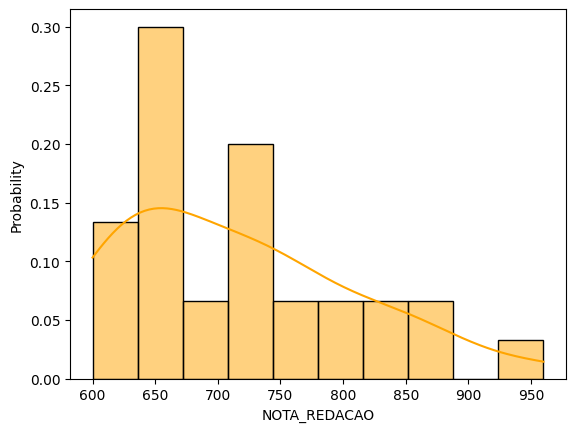

In [39]:
sns.histplot(colegioY, x="NOTA_REDACAO", bins=10, color="orange", kde = True, stat="probability");

In [36]:
import scipy.stats as stats
import matplotlib as plt